# <p> Clustering</p>

<p>By dividing the training space into subspaces, the machine learning approach known as clustered linear regression (CLR) increases the accuracy of conventional linear regression.</p>

In [31]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib import rcParams 


import sklearn 
from sklearn.cluster import KMeans 
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale 
 

import sklearn.metrics as am 
from sklearn import datasets 
from sklearn.metrics import confusion_matrix,classification_report 

 
import seaborn as sns 


<p>This code imports libraries and modules for numerical operations, data manipulation, visualization, clustering with K-Means, data scaling, and model evaluation in machine learning.</p>

In [32]:
# Graph setup 

%matplotlib inline 

rcParams['figure.figsize'] = 7,4 

<p>This code configures matplotlib to display plots inline within a Jupyter notebook and sets the default figure size to 7x4 inches.</p>

In [33]:
# We will use the scikit built-in dataset 'Iris' - https://en.wikipedia.org/wiki/Iris_flower_data_set 

iris = datasets.load_iris() 

 

X = scale(iris.data) 

 

y = pd.DataFrame(iris.target) 

variable_names = iris.feature_names 

X[0:10,] 

#Build and run the model 

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993],
       [-1.50652052,  0.78880759, -1.34022653, -1.18381211],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 ],
       [-1.14301691,  0.09821729, -1.2833891 , -1.44707648]])

<p>This code loads the Iris dataset, scales the feature data, converts the target labels to a pandas DataFrame, retrieves the feature names, and displays the first 10 rows of the scaled feature data.</p>

In [34]:
# to suppress memory leak warning: 

import os 

os.environ['OMP_NUM_THREADS'] = '1' 

 

 

<p>This code sets the environment variable OMP_NUM_THREADS to '1' to limit the number of threads used by OpenMP parallel processing to a single thread.</p>

In [35]:
# Cluster the data 

clustering = KMeans(n_clusters=3, random_state=5, n_init=10) # sets the number of centroids and randomizes centroid positions 

clustering.fit(X) 

KMeans(n_clusters=3, n_init=10, random_state=5)

<p>This code initializes a KMeans clustering model with 3 clusters, sets a random seed for reproducibility, and fits the model to the scaled feature data X.</p>

In [36]:
iris_df = pd.DataFrame(iris.data) 

iris_df.columns = ["sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width"] 

y.columns = ["Targets"] 

<p>This code creates a pandas DataFrame from the Iris dataset's feature data, assigns column names to the DataFrame, and renames the column in the target DataFrame y to "Targets."</p>

Text(0.5, 1.0, 'K-Means Classification')

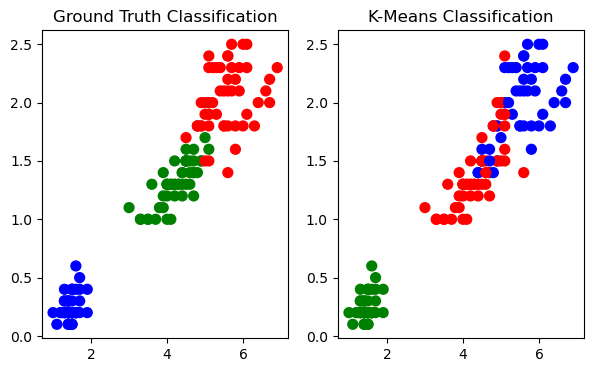

In [37]:
relabel = np.choose(clustering.labels_, [2,0,1]).astype(np.int64) 

 

plt.subplot(1,2,1) 

 

# Example color_theme definition 

color_theme = np.array((['blue', 'green', 'red']))

 

# Petal_Length along the x-axis and Petal_Width along the y-axis 

plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[iris.target], s=50) 

plt.title("Ground Truth Classification") 

 

plt.subplot(1,2,2) 

plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[clustering.labels_], s=50) 

plt.title("K-Means Classification") 



<p>This code relabels KMeans clustering results for visualization, then plots two scatter plots side-by-side: one showing the ground truth classification of Iris data and the other showing the KMeans clustering results, both using colors to differentiate classes.</p>

In [38]:
print(classification_report(y, relabel)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.74      0.78      0.76        50
           2       0.77      0.72      0.74        50

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150



<p>
This code prints a classification report that evaluates the performance of the relabeled KMeans clustering results (relabel) against the true target labels (y).</p>